In [1]:
# Libraries

import pandas as pd
import numpy as np


from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [2]:
train = pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv")
test = pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_AbJTz2l.csv")
sample = pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_8RXa3c6.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [6]:
train.shape

(8523, 12)

In [7]:
test.shape

(5681, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
train.Item_Identifier

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [13]:
train["source"] = "train"
test["source"] = "test"

In [14]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,test
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,test


In [15]:
df = pd.concat([train,test])

In [16]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [17]:
df.shape

(14204, 13)

In [18]:
df["Item_Identifier"].nunique()

1559

In [19]:
df["Item_Identifier_2"] = df["Item_Identifier"].apply(lambda x : x[0:2])
df["Item_Identifier_3"] = df["Item_Identifier"].apply(lambda x : x[0:3])

In [20]:
df["Item_Identifier_2"].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

In [21]:
df["Item_Identifier_3"].value_counts()

FDT    467
FDW    460
FDX    460
FDV    454
FDU    452
      ... 
DRO     27
DRP     19
DRZ     18
DRY      9
DRQ      9
Name: Item_Identifier_3, Length: 71, dtype: int64

In [22]:
del df["Item_Identifier_3"]

In [23]:
df["Item_Weight"].isna().sum()

2439

In [24]:
df.iloc[0:100,1]

0      9.30
1      5.92
2     17.50
3     19.20
4      8.93
      ...  
95      NaN
96    12.15
97     8.75
98      NaN
99     8.75
Name: Item_Weight, Length: 100, dtype: float64

In [25]:
df["Item_Weight"] = df.groupby("Item_Identifier_2").Item_Weight.transform(lambda x : x.fillna(x.mean()))

In [26]:
df.iloc[0:100,1]

0      9.300000
1      5.920000
2     17.500000
3     19.200000
4      8.930000
        ...    
95    12.735577
96    12.150000
97     8.750000
98    13.344139
99     8.750000
Name: Item_Weight, Length: 100, dtype: float64

In [27]:
df["Item_Fat_Content"].nunique()

5

In [28]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [29]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [30]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF" : "Low Fat", "low fat" : "Low Fat", "reg" : "Regular"})

In [31]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

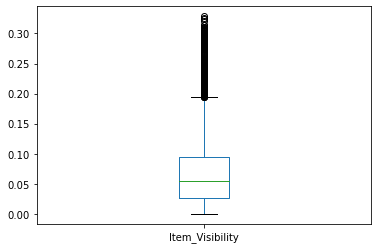

In [32]:
df["Item_Visibility"].plot(kind = "box")

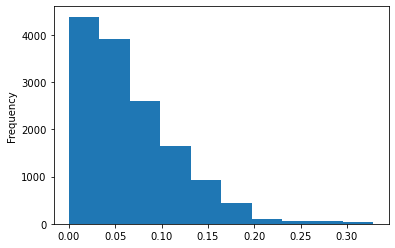

In [33]:
df["Item_Visibility"].plot(kind = "hist")

In [34]:
df["Item_Visibility"].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [35]:
df.sort_values(by = ["Item_Identifier", "Item_Visibility"])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_2
1197,DRA12,11.600000,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158,train,DR
1693,DRA12,11.600000,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078,train,DR
3912,DRA12,12.116645,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test,DR
1245,DRA12,11.600000,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772,train,DR
500,DRA12,11.600000,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,DR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.650000,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288,train,NC
1969,NCZ54,14.650000,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728,train,NC
7738,NCZ54,14.650000,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832,train,NC
4700,NCZ54,14.650000,Low Fat,0.083831,Household,161.4552,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test,NC


In [36]:
df.loc[df["Item_Visibility"] == 0.000000,"Item_Visibility"] = np.NAN

In [37]:
df["Item_Visibility"].isna().sum()

879

In [38]:
df["Item_Visibility"] = df.groupby(["Item_Identifier"]).Item_Visibility.transform(lambda x : x.fillna(x.mean()))

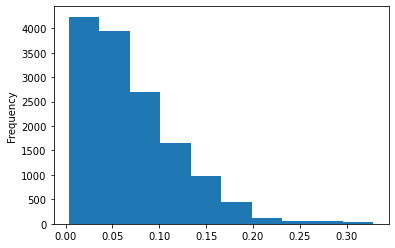

In [39]:
df["Item_Visibility"].plot(kind = "hist")

In [40]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [41]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_Identifier_2'],
      dtype='object')

In [42]:
df["Item_MRP"].isna().sum()

0

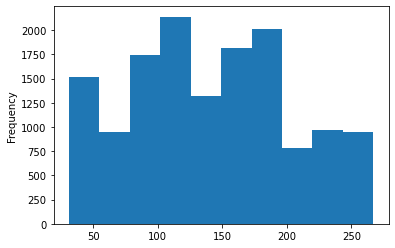

In [43]:
df["Item_MRP"].plot(kind = "hist")

In [44]:
df["Outlet_Identifier"].value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [45]:
df["Outlet_Identifier"].nunique()

10

In [46]:
df["Outlet_Identifier"].isna().sum()

0

In [47]:
df["Outlet_Establishment_Year"].isna().sum()

0

In [48]:
df["Outlet_Establishment_Year"].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [49]:
df["Outlet_Establishment_Year"].nunique()

9

In [50]:
df.groupby("Outlet_Establishment_Year").Outlet_Identifier.value_counts()

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT027               1559
                           OUT019                880
1987                       OUT013               1553
1997                       OUT046               1550
1998                       OUT010                925
1999                       OUT049               1550
2002                       OUT045               1548
2004                       OUT035               1550
2007                       OUT017               1543
2009                       OUT018               1546
Name: Outlet_Identifier, dtype: int64

In [51]:
from datetime import datetime

In [52]:
datetime.now().year

2020

In [53]:
df["Outlet_Age"] = datetime.now().year-df["Outlet_Establishment_Year"]

In [54]:
df["Outlet_Age"].value_counts()

35    2439
33    1553
23    1550
21    1550
16    1550
18    1548
11    1546
13    1543
22     925
Name: Outlet_Age, dtype: int64

In [55]:
del df["Outlet_Establishment_Year"]

In [56]:
df["Outlet_Size"].isna().sum()

4016

In [57]:
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [58]:
import matplotlib.pyplot as plt

In [59]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.020239,0.033206,0.011182,-0.000312
Item_Visibility,-0.020239,1.000000,-0.009052,-0.127014,0.083799
Item_MRP,0.033206,-0.009052,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.011182,-0.127014,0.567574,1.000000,0.049135
Outlet_Age,-0.000312,0.083799,-0.000141,0.049135,1.000000


In [60]:
df.groupby(["Outlet_Identifier"]).Outlet_Size.value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           1553
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [61]:
df.groupby(["Outlet_Identifier"]).Outlet_Size.transform(lambda x : x.fillna(x.mode()))

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 14204, dtype: object

In [62]:
df.groupby(["Outlet_Location_Type"]).Outlet_Size.value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          2430
                      Medium         1550
Tier 2                Small          1550
Tier 3                Medium         3105
                      High           1553
Name: Outlet_Size, dtype: int64

In [63]:
df.groupby(["Outlet_Location_Type", "Outlet_Type"]).Outlet_Size.value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [64]:
df.groupby(["Outlet_Type"]).Outlet_Size.value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [65]:
df["Outlet_Size"] = df.groupby(["Outlet_Location_Type"]).Outlet_Size.transform(lambda x : x.fillna(x.mode()[0]))

In [66]:
df["Outlet_Location_Type"].isna().sum()

0

In [67]:
df["Outlet_Type"].isna().sum()

0

In [68]:
df["Outlet_Type"].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [69]:
df["Outlet_Type_Category"] = df["Outlet_Type"].apply(lambda x : x.split()[0])

In [70]:
df["Outlet_Type_Category"].value_counts()

Supermarket    12399
Grocery         1805
Name: Outlet_Type_Category, dtype: int64

In [71]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.020239,0.033206,0.011182,-0.000312
Item_Visibility,-0.020239,1.000000,-0.009052,-0.127014,0.083799
Item_MRP,0.033206,-0.009052,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.011182,-0.127014,0.567574,1.000000,0.049135
Outlet_Age,-0.000312,0.083799,-0.000141,0.049135,1.000000


In [72]:
df.select_dtypes(include=np.number).drop(columns=["Item_Outlet_Sales"])


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,21
1,5.92,0.019278,48.2692,11
2,17.50,0.016760,141.6180,21
3,19.20,0.022930,182.0950,22
4,8.93,0.014670,53.8614,33
...,...,...,...,...
5676,10.50,0.013496,141.3154,23
5677,7.60,0.142991,169.1448,11
5678,10.00,0.073529,118.7440,18
5679,15.30,0.098200,214.6218,13


In [73]:
#Check for Multi Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables set 
X = df.select_dtypes(include=np.number).drop(columns=["Item_Outlet_Sales"])
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)


           feature       VIF
0      Item_Weight  6.321414
1  Item_Visibility  2.795654
2         Item_MRP  4.913460
3       Outlet_Age  5.862205


In [74]:
df_number_columns = df.select_dtypes(include = np.number).columns

In [75]:
df_number_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

In [76]:
df_category_columns = df.select_dtypes(exclude = np.number).columns

In [77]:
df_category_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source',
       'Item_Identifier_2', 'Outlet_Type_Category'],
      dtype='object')

In [78]:
data_to_encode = df[df_category_columns].drop(columns = ["Item_Identifier","Outlet_Identifier", "source"])

In [79]:
df_category_encoded = pd.get_dummies(data_to_encode)

In [80]:
df_final = pd.concat([df_category_encoded, df[df_number_columns],df[["Item_Identifier","Outlet_Identifier", "source"]]], axis= 1)

In [81]:
train_preprocessed = df_final[df_final["source"]=="train"]

In [82]:
test_preprocessed = df_final[df_final["source"]=="test"]

In [83]:
del train_preprocessed["source"]
train_preprocessed

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier_2_NC,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,9.300,0.016047,249.8092,3735.1380,21,FDA15,OUT049
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,5.920,0.019278,48.2692,443.4228,11,DRC01,OUT018
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,17.500,0.016760,141.6180,2097.2700,21,FDN15,OUT049
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,19.200,0.022930,182.0950,732.3800,22,FDX07,OUT010
4,1,0,0,0,0,0,0,0,0,0,...,1,0,1,8.930,0.014670,53.8614,994.7052,33,NCD19,OUT013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,0,0,1,6.865,0.056783,214.5218,2778.3834,33,FDF22,OUT013
8519,0,1,1,0,0,0,0,0,0,0,...,0,0,1,8.380,0.046982,108.1570,549.2850,18,FDS36,OUT045
8520,1,0,0,0,0,0,0,0,0,0,...,1,0,1,10.600,0.035186,85.1224,1193.1136,16,NCJ29,OUT035
8521,0,1,0,0,0,0,0,0,0,0,...,0,0,1,7.210,0.145221,103.1332,1845.5976,11,FDN46,OUT018


In [84]:
del test_preprocessed["source"]
test_preprocessed

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier_2_NC,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,20.750000,0.007565,107.8622,NaN,21,FDW58,OUT049
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,8.300000,0.038428,87.3198,NaN,13,FDW14,OUT017
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,14.600000,0.099575,241.7538,NaN,22,NCN55,OUT010
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,7.315000,0.015388,155.0340,NaN,13,FDQ58,OUT017
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,12.735577,0.118599,234.2300,NaN,35,FDY38,OUT027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,1,0,0,0,0,0,0,0,0,...,0,0,1,10.500000,0.013496,141.3154,NaN,23,FDB58,OUT046
5677,0,1,0,0,0,0,0,0,0,0,...,0,0,1,7.600000,0.142991,169.1448,NaN,11,FDD47,OUT018
5678,1,0,0,0,0,0,0,0,0,0,...,1,0,1,10.000000,0.073529,118.7440,NaN,18,NCO17,OUT045
5679,0,1,0,0,0,1,0,0,0,0,...,0,0,1,15.300000,0.098200,214.6218,NaN,13,FDJ26,OUT017


In [85]:
train.shape

(8523, 13)

In [86]:
test.shape

(5681, 12)

In [87]:
train_preprocessed.to_csv("train_BigMartSales_Preprocessed.csv", index = False)
test_preprocessed.to_csv("test_BigMartSales_Preprocessed.csv", index = False)

In [88]:
df_final.to_csv("BigMartSales_Preprocessed.csv")

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
poly = PolynomialFeatures(degree=2)

In [ ]:
new_X = poly.fit_transform(df[[""]])